In [29]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

# Parameters
N = 2                          # number of inputs
T = 10000                      # time (number of training samples)
dt = 1                         # simulation time step
alpha_w = 10**(-6)             # learning rate for weights
y_target = 10                   # output target
x = np.array([[20,0],[0,20]])  # inputs have two patterns: one (0-20) and two (20-0)
tau_theta = 10                 # time constant for theta

c = 1/50

# Init
y = np.zeros((T,1))              # output
w = 0.5*np.ones((T,N))           # weights
theta = 5*np.ones((T,1))         # sliding threshold theta

[20  0] [ 0 20]


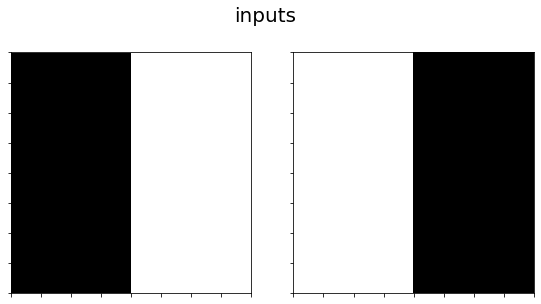

In [30]:
print(x[:,0],x[:,1])
x1 = [x[:,0],x[:,0]]
x2 = [x[:,1],x[:,1]]

fig, axs = plt.subplots(1,2,figsize=(8,5))
fig.tight_layout()
fig.suptitle('inputs', fontsize=20)
axs[0].imshow(x1,cmap='binary')
axs[1].imshow(x2,cmap='binary')
axs[0].set_yticklabels([])
axs[0].set_xticklabels([])
axs[1].set_yticklabels([])
axs[1].set_xticklabels([])
plt.show()

## BCM learning rule:

$ \Large y = \sum w_i x_i $ --> Linear output neuron

$ \Large\frac{dw}{dt} = \alpha ~ xy ~ (y-\theta) $

$ \Large\frac{d\theta}{dt} = c ~ (-\theta + \frac{y^2}{y_{target}}) $

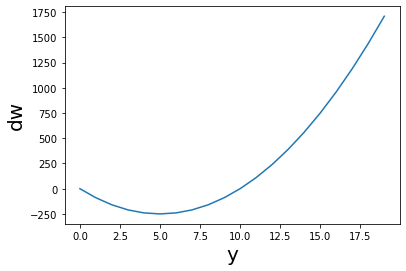

In [31]:
def update_weights_BCM(x,y,theta):
    return x*y*(y-theta)

x_ = 10
y_ = np.arange(20)
theta_ = 10

dw = update_weights_BCM(x_,y_,theta_)
plt.plot(y_,dw)
plt.ylabel('dw',fontsize=20)
plt.xlabel('y',fontsize=20)
plt.show()

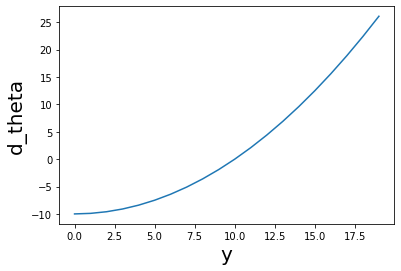

In [32]:
def update_threshold_BCM(theta,y,y_target):
    return y**2/y_target - theta
 
theta_ = 10
y_ = np.arange(20)
y_targ = 10

d_theta = update_threshold_BCM(theta_,y_,y_targ)
plt.plot(y_,d_theta)
plt.ylabel('d_theta',fontsize=20)
plt.xlabel('y',fontsize=20)
plt.show()

In [33]:
np.random.randint(0,2)

1

In [34]:
# Apply BCM rule
for t in range(T-1):
    p = np.random.randint(0,2)                                               # presentation of pattern 0 or 1 randomly
    y[t] = np.dot(w[t,:],x[p,:])                                             # compute the output
    theta[t+1] = theta[t]+(dt/tau_theta)*(y[t]**2/y_target - theta[t])          # update sliding theshold
    delta_w = alpha_w*x[p,:]*y[t]*(y[t]-theta[t])
    w[t+1,:] = w[t,:] + delta_w                  # update of the weights    

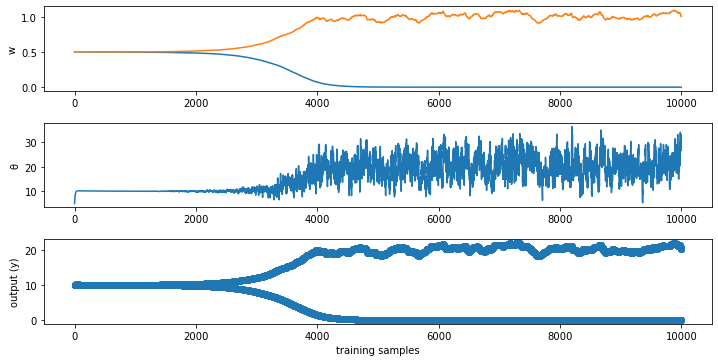

In [35]:
%matplotlib inline

fig, axs = plt.subplots(3,figsize=(10,5))
fig.tight_layout()
axs[0].plot(w)
axs[0].set(ylabel='w')
axs[1].plot(theta)
axs[1].set(ylabel='θ')
axs[2].scatter(np.arange(len(y)),y) 
axs[2].set(ylabel='output (y)',xlabel='training samples')
plt.show()

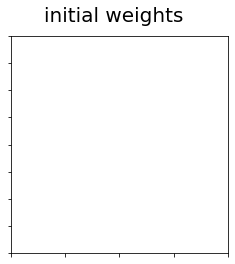

initial weights: [0.5 0.5]


In [8]:
fig,ax = plt.subplots(1)
fig.suptitle('initial weights', fontsize=20)
ax.imshow([w[0,:],w[0,:]],cmap='binary')
ax.set_yticklabels([])
ax.set_xticklabels([])
plt.show()

print('initial weights:', w[0,:])

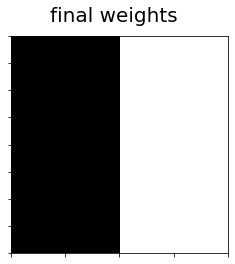

final weights: [0.70201187 0.69948863]


In [9]:
fig,ax = plt.subplots(1)
fig.suptitle('final weights', fontsize=20)
ax.imshow([w[-1,:],w[-1,:]],cmap='binary')
ax.set_yticklabels([])
ax.set_xticklabels([])
plt.show()

print('final weights:',w[-1,:])